# Data Acquisition ⚛

In [68]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [69]:
target = new_client.target # Search the organism or protein (can be done in chembl manually)
target_query = target.search("alzheimer")
targets = pd.DataFrame.from_dict(target_query) # Convert the results to a dataframe
targets 


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,[],Homo sapiens,Amyloid-beta A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [70]:
selected_target = targets.target_chembl_id[5] #bioactivity of Amyloid-beta A4 in human ( index 5 and gives the unique id of the target)
selected_target

'CHEMBL2487'

In [71]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_type='IC50') ## Only bioactivity data for Amyloid-beta 4 that are reported as [IC50 values (nanomolar) - concentration of a substance that is required to inhibit a biological function by 50%.]

In [72]:
type(res)

chembl_webresource_client.query_set.QuerySet

In [73]:
#pd.set_option('display.max_columns', None)
#pd.set_option
df_bioactivity_data = pd.DataFrame.from_dict(res)
df_bioactivity_data


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


In [74]:
df_bioactivity_data.standard_type.unique() # Check the unique values in the standard_type column of the bioactivity table

array(['IC50'], dtype=object)

In [75]:
df_bioactivity_data.standard_value.unique() #same for standard_value


array(['5000.0', '2700.0', '1800.0', '11000.0', '10000.0', '305000.0',
       '75000.0', None, '77000.0', '94000.0', '21000.0', '46000.0',
       '129000.0', '83000.0', '67000.0', '210000.0', '41000.0', '35000.0',
       '-1.0', '111000.0', '22000.0', '14000.0', '96300.0', '-5.0',
       '101000.0', '70600.0', '31600.0', '409000.0', '33600.0', '57900.0',
       '81000.0', '17700.0', '114000.0', '64000.0', '12000.0', '20000.0',
       '280000.0', '6700.0', '5.2', '6000.0', '9900.0', '740.0', '180.0',
       '200.0', '6800.0', '3000.0', '74.0', '30.0', '160.0', '17.0',
       '152.0', '54.0', '29.0', '15.0', '530.0', '16.0', '140.0', '120.0',
       '540.0', '450.0', '650.0', '600.0', '73.0', '60.0', '360.0',
       '190.0', '900.0', '1000.0', '680.0', '880.0', '780.0', '1900.0',
       '86.0', '280.0', '220.0', '0.3', '56.0', '47.0', '46.0', '14.0',
       '12.0', '27.0', '3.5', '2.5', '2.8', '2.4', '81.0', '6.9', '9.6',
       '25.0', '10.0', '13.0', '9.0', '28.0', '3.2', '104.0', '57.

In [76]:
numeric = pd.to_numeric(df_bioactivity_data['standard_value'], errors='coerce') # Convert the standard_value column to numeric values (easier for if conditions in the near future)

min_value = numeric.min() # just to get a feeling of the values

min_row = df_bioactivity_data[numeric == min_value] 

min_value, min_row # check for min standard_value (If we can inihibit by 50% with a lower concentration it means it has great power cuz we need less concentration to inhibit (small quantity big consequences))

(-5.0,
    action_type activity_comment  activity_id activity_properties  \
 39        None             None      1606122                  []   
 
    assay_chembl_id                                  assay_description  \
 39    CHEMBL856813  Concentration required to inhibit A beta 40 pe...   
 
    assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
 39          B                    None                   None  BAO_0000190   
 
     ... target_organism         target_pref_name target_tax_id text_value  \
 39  ...    Homo sapiens  Amyloid-beta A4 protein          9606       None   
 
     toid  type units    uo_units upper_value value  
 39  None  IC50     %  UO_0000187        None  -5.0  
 
 [1 rows x 46 columns])

In [77]:
df_bioactivity_data.to_csv('bioactivity_data.csv', index = False) #CSV FILE bioactivity data

In [78]:
import os
print(os.getcwd()) #local project (no resources for more :[ , yet :] )

/Users/bm_castro/Desktop/bioinf


# Preprocess Data 🧹

In [79]:
df_hmiss = df_bioactivity_data[df_bioactivity_data.standard_value.notna()] #returns true for values that are not missing
df_hmiss = df_hmiss[df_bioactivity_data.canonical_smiles.notna()] #filter even further for canonical smiles that are not missing
df_hmiss

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/1513211678.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hmiss = df_hmiss[df_bioactivity_data.canonical_smiles.notna()] #filter even further for canonical smiles that are not missing


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


In [80]:
len(df_hmiss.canonical_smiles.unique())

1241

In [81]:
df_drop = df_hmiss.drop_duplicates(["canonical_smiles"]) #drop duplicates in the canonical smiles column
df_drop

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,None,None,25720806,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0


In [82]:
selection = ["molecule_chembl_id", "canonical_smiles", "standard_value"]
df_preprocessed = df_drop[selection]
df_preprocessed #creating a new dataframe with the columns that interest us more

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1714,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,50000.0
1715,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0
1716,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0
1717,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0


In [83]:
df_preprocessed.to_csv("bioactivity_data_preprocessed.csv", index = False) #store the file

***

In [84]:
df_labeling = pd.read_csv("bioactivity_data_preprocessed.csv")

In [85]:
bioactivity_class = [] #labeling as active or inactive based on bioactivity data
for i in df_labeling.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermidiate")
#trivial for loop classification based on the standard value. Note: Usually i use df["column_name"] instead of df.column_name but i decided to try something different here. Don't judge me :D

In [86]:
df_labeling.molecule_chembl_id

0        CHEMBL311039
1        CHEMBL450926
2        CHEMBL310242
3         CHEMBL74874
4         CHEMBL75183
            ...      
1236    CHEMBL5414196
1237     CHEMBL448891
1238    CHEMBL1235966
1239    CHEMBL5434024
1240    CHEMBL5411138
Name: molecule_chembl_id, Length: 1241, dtype: object

In [87]:
mol_cid = []
for i in df_labeling.molecule_chembl_id:
    mol_cid.append(i) #iterate through the molecule_chembl_id column and append the values to the mol_cid list. do the same for canonical smiles and standard value

In [88]:
canonical_smiles = []
for i in df_labeling.canonical_smiles:
    canonical_smiles.append(i)

In [89]:
standard_value = []
for i in df_labeling.standard_value:
    standard_value.append(i)

In [90]:
data_tuples = list(zip(mol_cid, canonical_smiles, standard_value, bioactivity_class,)) #zip the lists so [(molcid[0], canonical_smiles[0], standard_value[0], bioactivity_class[0], moldic[1] .....)] are in the same tuple
df_features = pd.DataFrame(data_tuples, columns=['mol_cid', 'canonical_smiles', 'standard_value', 'bioactivity_class']) #create a new dataframe with the zipped lists
df_features
#new dataframe is structured to contain information about drug candidates (molecule IDs, chemical structures, bioactivity values, and bioactivity classes) that are being evaluated for their interaction with the Amyloid-beta A4 protein

,mol_cid,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1236,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,50000.0,inactive
1237,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0,inactive
1238,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0,inactive
1239,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0,inactive


In [91]:
df_features.to_csv('bioactivity_data_features_processed.csv', index = False)

In [92]:
df_features

,mol_cid,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1236,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,50000.0,inactive
1237,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0,inactive
1238,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0,inactive
1239,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0,inactive


### Treat the smiles 👨🏻‍🔬: drop the canonical smile column? why? Canonical smiles might have multicomponent compounds, salts which are considered molecular fragments and they are separated by "." .
- There is an assumption tho: Essentially these fragments are considered the smaller part of the structure thus, they will be discarded.
- What remains is a list with the bigger fragment (the main and bigger structure)

In [93]:
df_drop_smiles = df_features.drop(columns='canonical_smiles')

In [94]:
smiles=[]

for i in df_features.canonical_smiles.to_list():
    fragment = str(i).split('.') #goes throught each smile converting into a string and splitting by "." why do we do this? explained before in the markdown above
    fragment_long = max(fragment, key = len) #biggest fragment
    smiles.append(fragment_long) #added to smiles

smiles = pd.Series(smiles, name="canonical_smiles")  #The series is the new canonical smiles column where the big fragment is stored


In [95]:
df_smiles_cleaned = pd.concat([df_drop_smiles, smiles], axis = 1) #all concatenated again cleaned
df_smiles_cleaned

,mol_cid,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL311039,5000.0,intermidiate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermidiate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermidiate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
1236,CHEMBL5414196,50000.0,inactive,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1
1237,CHEMBL448891,50000.0,inactive,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2
1238,CHEMBL1235966,50000.0,inactive,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2
1239,CHEMBL5434024,50000.0,inactive,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2


### 💊 Lipinski's "Rule of Five" is a set of guidelines used to evaluate the druglikeness of a compound, specifically for oral bioavailability. It assesses four main parameters that are important for drug absorption and distribution.
- Molecular Weight: Should be less than 500 Daltons.
- LogP (Octanol-water partition coefficient): Should be less than 5, indicating acceptable lipophilicity.
- Hydrogen Bond Donors: Should be fewer than 5.
- Hydrogen Bond Acceptors: Should be fewer than 10.

In [96]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [97]:
def lipinski(smiles): 

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #convert smiles to mol thanks to molfromsmiles. Why? because smiles are strings which are immutable and mol is mutable
        moldata.append(mol)
       
    baseData= np.arange(1,1) #empty array
    i=0 #tracking number of iterations
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol) #uses Descriptor module to caluclate the molecular weight and logP using the mol object
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)# uses Lipinski module to calculate the number of hydrogen donors and acceptors (at first used Descriptor module but it was not working, did some digging)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   #array with the descriptors with dimensions 1x4 (row)
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])  #it is going to stack the rows on top of each other
        i=i+1      
    # in the end what we have is a 2D array where each row represents the descriptors of a molecule (i.e: molecular weight.... de uma molecula (0=C=0...))
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [98]:
df_lipinski = lipinski(df_smiles_cleaned.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.3188,1.0,2.0
1,299.461,3.2412,1.0,3.0
2,311.422,3.3188,1.0,2.0
3,327.877,3.8331,1.0,2.0
4,372.328,3.9422,1.0,2.0
...,...,...,...,...
1236,313.397,3.1811,1.0,4.0
1237,341.407,3.0735,1.0,5.0
1238,327.380,2.7705,2.0,5.0
1239,324.356,2.7788,2.0,4.0


In [99]:
df_features

,mol_cid,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1236,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,50000.0,inactive
1237,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0,inactive
1238,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0,inactive
1239,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0,inactive


In [100]:
df_combined = pd.concat([df_features, df_lipinski], axis = 1)

In [101]:
df_combined

,mol_cid,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermidiate,311.422,3.3188,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermidiate,299.461,3.2412,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermidiate,311.422,3.3188,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.8331,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.9422,1.0,2.0
...,...,...,...,...,...,...,...,...
1236,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,50000.0,inactive,313.397,3.1811,1.0,4.0
1237,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0,inactive,341.407,3.0735,1.0,5.0
1238,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0,inactive,327.380,2.7705,2.0,5.0
1239,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0,inactive,324.356,2.7788,2.0,4.0


In [102]:
df_combined.shape

(1241, 8)

### 🔢 Conversion of IC50 into pIC50
- Convert nM to M (multiplying by 10^-9)
- -log10(IC50)(negative logarithm)
- Delete standard_value and create a pIC50 column.

In [103]:
df_combined.standard_value.describe()

count    1.241000e+03
mean     2.352004e+04
std      8.381394e+04
min     -1.000000e+00
25%      2.000000e+02
50%      4.400000e+03
75%      1.791000e+04
max      1.655000e+06
Name: standard_value, dtype: float64

####Note: some large values need to be capped (fixed ate one number) otherwise they would become negative for Amyloide-beta A4

In [104]:
def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 1000000000:
            i=1000000000
        norm.append(i) #cap the values at 1 billion
        
    input["standard_value_norm"] = norm #add the normalized values to the dataframe
    x = input.drop("standard_value",axis=1) #drop the standard value column and replace it with the normalized values
    
    return x 

In [105]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']: #iterate through the normalized values
        M = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(M))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)
        
    return x
#same logic as before but now we are going to convert them to pIC50 values

In [106]:
df_norm = norm_value(df_combined)
df_norm

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermidiate,311.422,3.3188,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermidiate,299.461,3.2412,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermidiate,311.422,3.3188,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1236,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,inactive,313.397,3.1811,1.0,4.0,50000.0
1237,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,50000.0
1238,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,50000.0
1239,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,50000.0


In [107]:
df_pIC50 = pIC50(df_norm)
df_pIC50

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/2849275571.py:8: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(M))


,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermidiate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermidiate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermidiate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1236,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,inactive,313.397,3.1811,1.0,4.0,4.301030
1237,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
1238,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
1239,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030


In [108]:
df_pIC50.pIC50.describe() #little bit of statistics

count    1240.000000
mean        5.720775
std         1.327067
min         2.781202
25%         4.746662
50%         5.355072
75%         6.698970
max         9.522879
Name: pIC50, dtype: float64

In [109]:
df_pIC50.to_csv("bioactivity_data_pIC50.csv")

In [110]:
df_active_inactive = df_pIC50[df_pIC50['bioactivity_class'] != 'intermidiate'].reset_index(drop=True) #just 2 classes to make it easier (active and inactive remaning)
df_active_inactive

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
1,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
2,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
3,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
4,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
897,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,inactive,313.397,3.1811,1.0,4.0,4.301030
898,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
899,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
900,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030


***

# Exploratory Data Analysis (EDA) (Chemical space analysis) 🧪

In [111]:
import seaborn as sns
sns.set_theme(style='ticks') 
import matplotlib.pyplot as plt

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/283749122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bioactivity_class", data=df_active_inactive, edgecolor = "black", palette= "Set2") #countplot for the bioactivity class


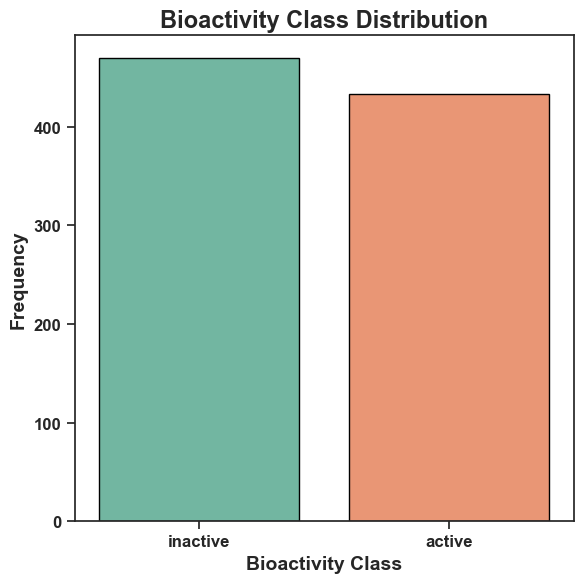

In [112]:
plt.figure(figsize=(6,6))
sns.countplot(x="bioactivity_class", data=df_active_inactive, edgecolor = "black", palette= "Set2") #countplot for the bioactivity class

plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 14, fontweight = "bold")
plt.title("Bioactivity Class Distribution", fontsize= 17, fontweight= "bold")

plt.xticks(fontsize = 12, fontweight= "bold")
plt.yticks(fontsize=12, fontweight = "bold")

plt.tight_layout()
plt.savefig("plot_bioactivity_class_distribution.pdf")

plt.show()

In [113]:
df_active_inactive['bioactivity_class'].value_counts()['active']

433

In [114]:
df_active_inactive['bioactivity_class'].value_counts()['inactive']

469

#### MW vs LogP (lets check for trends - clusters, liophility and molecularsize relation)

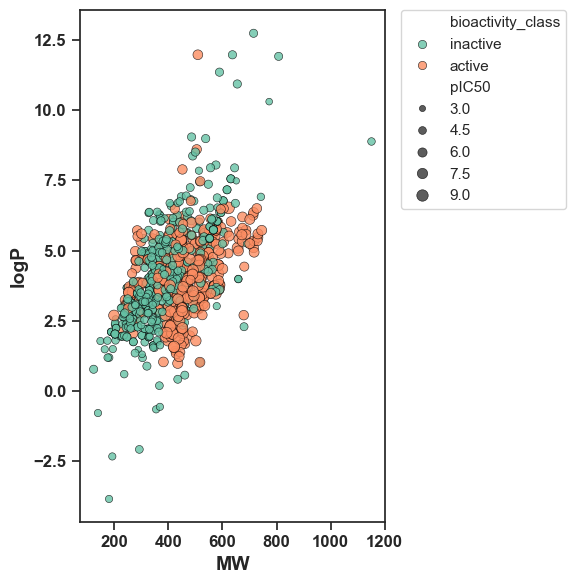

In [115]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="MW", y="LogP", data=df_active_inactive, edgecolor = "black", palette= "Set2", size='pIC50', hue="bioactivity_class", alpha=0.8)

plt.xlabel("MW", fontsize = 14, fontweight = "bold")
plt.ylabel("logP", fontsize = 14, fontweight = "bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.xticks(fontsize = 12, fontweight= "bold")
plt.yticks(fontsize=12, fontweight = "bold")

plt.tight_layout()
plt.savefig("plot_MW_logP.pdf")

plt.show()

### Similar inactive and active cluster
### Inactive Compoundsare
-   Generally dispersed across different areas.
-   Main clustering occurs within the optimal Lipinski rule conditions.
### Active Compounds:
- Form a well-defined cluster with minimal dispersion.
- Cluster closely resembles that of inactive compounds.
- LogP values for most are well-positioned below 5.
- Molecular weight generally falls below 500 Daltons, though visibility could improve with more consistent adherence to this limit.

### To be fair, Lipinski's rules are limited and further assessments should be consider

### Boxplots de pIC50

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/3025556724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_active_inactive, palette= "Set2")


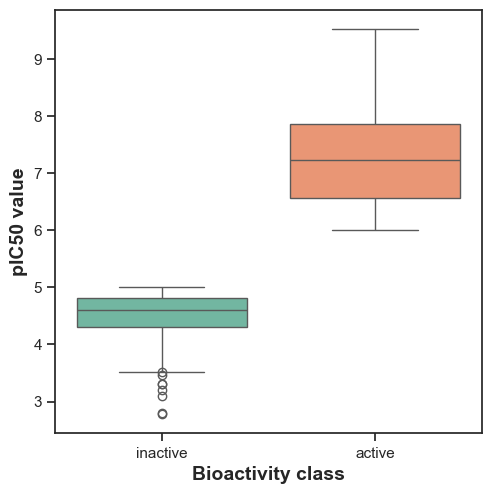

In [116]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_active_inactive, palette= "Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pic50.pdf')

- Show some outliers, while the active compounds are consistent and well-behaved, indicating that the bioactivity thresholds we set (e.g., IC50 < 1000 implies pIC50 > 5) are effective.
- The active compounds have notably higher pIC50 values compared to the inactive ones, which means they are more potent. This is due to the inverse relationship between IC50 and pIC50 values.

### Mann-Whitney U test for the statistical analysis (normality distribution p<0.05 they are statisticaly different) 

#### Brief explanation the Mann-Whitney parallelism with t-test
- It tests a difference between two INDEPENDENT samples. So it is the **non-parametric** counterpart to the t-test (**parametric**)
- Unlike t-test for the ManWhitney test **we dont need normal distribution** (because in the t-test we do the mean of each sample and the manwhitney we do rank sum of each sample (more on this later))
- For the t-test we see the mean between the two samples (man and women)

- For the man whitney? Considering two independent samples (man and woman) we are going to rank each individuall person. After that we sum the ranks for the sample of men and we sum the ranks in the sample of woman. After that we calculate the U1 and U2 with the number of cases (n1, n2) and the rank sum(T1 and T2) of each sample. After that we calculate the U-value with both U1 and U2. Calculate the expected value of U and Standard error of U and because of the expected value and error of U we got Z-value thus the p-value

- **Null hypothesis: in the two samples the rank sums DO NOT differ significantly, if p-value is < 0.05 the null hypothesis is rejected and we can say they are statistically different**


In [117]:
def mannwhitney(descriptor, verbose=False):
  
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df_man = df_active_inactive[selection]
  active = df_man[df_man['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df_man = df_active_inactive[selection]
  inactive = df_man[df_man['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [118]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


In [119]:
mannwhitney("MW") #p value is less than 0.05 so we reject the null hypothesis (H0) they are statistically different so distribution is different

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,132407.0,2.872319e-15,0.05,Different distribution (reject H0)


In [120]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,109914.5,0.032151,0.05,Different distribution (reject H0)


In [121]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,85213.5,0.000015,0.05,Different distribution (reject H0)


In [122]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,128731.5,1.615771e-12,0.05,Different distribution (reject H0)


/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/4135341525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_active_inactive, palette="Set2")


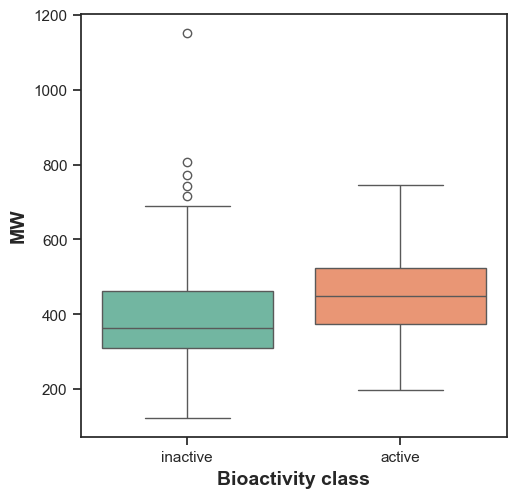

In [123]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/3548988316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_active_inactive, palette="Set2")


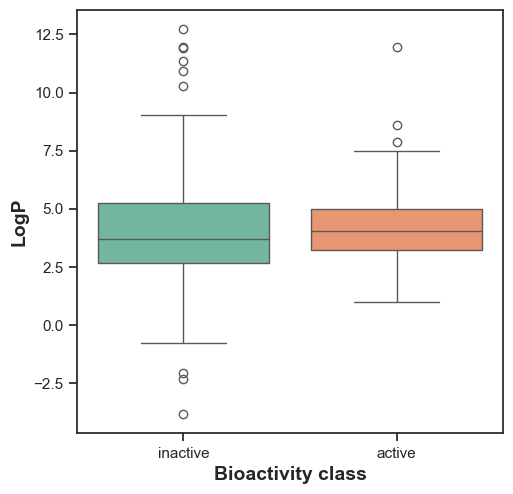

In [124]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/2663554997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_active_inactive, palette="Set2")


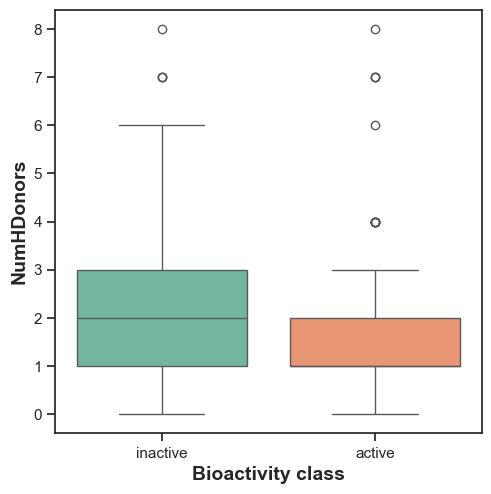

In [125]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

/var/folders/9g/6_lvfzkn1f93tsfp09gqpz6c0000gn/T/ipykernel_37100/2086055184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_active_inactive, palette="Set2")


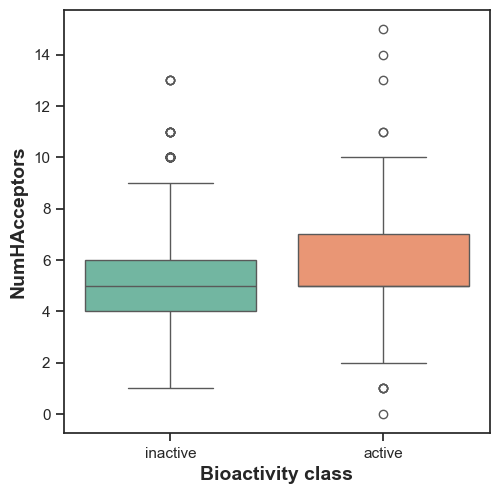

In [126]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_active_inactive, palette="Set2")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

### Some conclusions must be adressed: there are outliers, everything is statistically different minus logP which can suggest that solubility might not be that important and maybe polar interactions are prefered (HDonors and Acceptors). 

- Further conclusions can be adressed later

***


# Generate Descriptors and Molecular Fingerprints 🐾 0️⃣ 1️⃣ 
 - Skip after first generation

In [127]:
import os
os.environ['PATH'] = '/opt/homebrew/bin:' + os.environ['PATH'] #path to the rdkit library

In [128]:
!wget --version #check if wget is installed

GNU Wget 1.25.0 built on darwin24.1.0.

-cares +digest -gpgme +https +ipv6 +iri +large-file -metalink +nls 
+ntlm +opie -psl +ssl/openssl 

Wgetrc: 
    /opt/homebrew/etc/wgetrc (system)
Locale: 
    /opt/homebrew/Cellar/wget/1.25.0/share/locale 
Compile: 
    clang -DHAVE_CONFIG_H -DSYSTEM_WGETRC="/opt/homebrew/etc/wgetrc" 
    -DLOCALEDIR="/opt/homebrew/Cellar/wget/1.25.0/share/locale" -I. 
    -I../lib -I../lib -I/opt/homebrew/opt/openssl@3/include 
    -I/opt/homebrew/Cellar/libidn2/2.3.7/include -DNDEBUG -g -O2 
Link: 
    clang -I/opt/homebrew/Cellar/libidn2/2.3.7/include -DNDEBUG -g -O2 
    -L/opt/homebrew/Cellar/libidn2/2.3.7/lib -lidn2 
    -L/opt/homebrew/opt/openssl@3/lib -lssl -lcrypto -ldl -lz 
    ../lib/libgnu.a -liconv -lintl -Wl,-framework -Wl,CoreFoundation 
    -Wl,-framework -Wl,CoreServices -lunistring 

Copyright (C) 2015 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later
<http://www.gnu.org/licenses/gpl.html>.
This is free software: you ar

In [129]:
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip #download the zip file with the padel software (it is a software that calculates molecular descriptors) from a github repository
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh #download the shell script that will run the software from the same repository

--2025-01-07 11:56:40--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-01-07 11:56:40--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.3’

padel.zip.3         100%[===================>]  24.57M  6.25MB/s    in 3.9s    

2025-01-07 11:56:45 (6.29 MB/s) - ‘padel.zip.3’ saved [25768637/25768637]

--2025-01-07 11:56

In [130]:
! unzip padel.zip #unzip the file

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
df_pIC50

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermidiate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermidiate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermidiate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1236,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,inactive,313.397,3.1811,1.0,4.0,4.301030
1237,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
1238,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
1239,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030


In [ ]:
df_active_inactive

,mol_cid,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
1,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
2,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
3,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
4,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
897,CHEMBL5414196,COc1ccc(C[C@H]2c3c(ccc(OC)c3O)CCN2C)cc1,inactive,313.397,3.1811,1.0,4.0,4.301030
898,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
899,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
900,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030


In [ ]:
select = ['canonical_smiles', 'mol_cid']
df_select = df_pIC50[select]
df_select.to_csv("molecule.smi", sep='\t', index = False, header=False)


In [ ]:
! cat molecule.smi | head -5

CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1	CHEMBL311039
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1	CHEMBL450926
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1	CHEMBL310242
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1	CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1	CHEMBL75183


In [ ]:
! cat molecule.smi | wc -l

    1241


***


# PaDEL descriptor Software (java,homebrew....)
- Skip because when already done once

In [ ]:
! cat padel.sh #Remove (NaCl), Present nitro groups,
#PubChem fingerprints  (Binary representations)

In [ ]:
! bash padel.sh #generating molecular fingerprints

In [ ]:
! ls -l

- Essentially, each column in the dataframe represents a specific structural feature defined by PubChem (e.g., PubchemFP0 might indicate the presence of a certain type of ring structure). The values are binary, where "1" indicates the presence of that feature, and "0" indicates its absence

***

# Finally setting up data for the model 𝄃 ⊞

In [ ]:
df_reald_X = pd.read_csv("descriptors_output.csv")
df_reald_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL450926,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL195970,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL196279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL310242,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL563,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,CHEMBL5411138,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1237,CHEMBL1235966,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,CHEMBL448891,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,CHEMBL5425561,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Essentially, each column represents a specific structural feature defined by PubChem (e.g., PubchemFP0 might indicate the presence of a certain type of ring structure). The values are binary, where "1" indicates the presence of that feature, and "0" indicates its absence.

In [131]:
df_reald_X = df_reald_X.drop(columns=["Name"]) #dropar name para nao ser biased
df_reald_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1237,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1238,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1239,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df_Y = df_pIC50["pIC50"] #definir a nossa target
df_Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1236    4.301030
1237    4.301030
1238    4.301030
1239    4.301030
1240    4.575118
Name: pIC50, Length: 1241, dtype: float64

In [133]:
realdataset = pd.concat([df_reald_X, df_Y], axis=1)
realdataset #this is the dataset with features which are the molecular descriptors and the target which is the pIC50 values

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1237,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1238,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1239,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030


In [134]:
realdataset.to_csv("amyloydbetaA4_3classes_bioactivitydata_pIC50_pubchemfingerprint.csv", index= False)

***


# ML Models 🦾

In [ ]:
df_pIC50["bioactivity_class"].value_counts()

---

### Start here with new env

In [30]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import optuna
import mlflow
import pandas as pd
import numpy as np



In [10]:
df_model = pd.read_csv("amyloydbetaA4_3classes_bioactivitydata_pIC50_pubchemfingerprint.csv")
df_model

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1237,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1238,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1239,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030


In [11]:
X = df_model.drop("pIC50" , axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1237,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1238,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1239,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Y = df_model["pIC50"]
Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1236    4.301030
1237    4.301030
1238    4.301030
1239    4.301030
1240    4.575118
Name: pIC50, Length: 1241, dtype: float64

In [14]:
X.shape

(1241, 881)

In [15]:
Y.shape

(1241,)

# ML pipeline

- Feature Selection (should always be done after splitting (cuz of data leakage) but the feature selection method is simple in this first experience phase)

- VarianceThreshold is a simple baseline approach to feature selection filter method. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
- It is calculated for the binary case such as fingerprints: ***p x (1 - p)***, where  ***p*** is the proprostion of "1" 
- It requires careful tuning in threshold because we are probably removing ones that can be meaningfull so we have to be conservative

In [16]:
from sklearn.feature_selection import VarianceThreshold 
selection = VarianceThreshold(threshold=(.8 * (1 - .8))) #based on the explanation above, it will analyze the varaince of each feature x and removes those with varaiance below 0.16
#this is such a bsaic selection, obviously doesn't take into account the correlation between the features whcih in molecules could be interesting to analyze
X = selection.fit_transform(X)

In [17]:
X.shape #from 881 to 173 features

(1241, 173)

### Data split (80/20)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
X_train.shape, Y_train.shape

((992, 173), (992,))

In [20]:
X_test.shape, Y_test.shape

((249, 173), (249,))

In [21]:
Y_train.isna().sum()

1

In [22]:
Y_train = Y_train.fillna(Y_train.median()) #just filled with the median on missing values  (not the best option we should drop the row but well) (it was only one so it is not a big deal)

In [25]:
print("Missing values in X_train:", np.isnan(X_train).sum())  # Count of missing values in X_train


Missing values in X_train: 0


In [26]:

print("Missing values in y_train:", np.isnan(Y_train).sum())  # Count of missing values in Y_train

Missing values in y_train: 0


In [27]:
print("Missing values in y_train:", np.isnan(Y_test).sum())

Missing values in y_train: 0


In [28]:
print("Missing values in y_train:", np.isnan(X_test).sum())

Missing values in y_train: 0


## Optuna 🌀 and 5foldCV during training

### Reminder on some concepts

#### Metrics
- Which one to choose for this situation?
    - In drug discovery and QSAR (Quantitative Structure–Activity Relationship) modeling, ***RMSE*** is very common for pIC50 predictions
        - pIC50 (the target) is already in a log scale (the negative log of IC50). A small shift in pIC50 can mean a substantial change in potency.
        - A difference of 0.5 log units in potency is quite meaningful: it’s roughly a 3-fold difference in actual IC50 (since Δ pIC50 = 0.5 ΔpIC50=0.5 corresponds to 1 0 − 0.5 ≈ 0.316 10 −0.5 ≈0.316 changes in IC50).
    - With that in mind , in real-world scenarios rmse should be the choice. Since outliers are presented in our dataset, RMSE is going to penalize large errors quadratically, making it sensitive to a few extreme values that might not represent the bulk of the data. MAE avoids this issue and the goal changes from "sensitivity to extreme cases" to "prioritizing robust generalization".

---       


- RMSE  Sqrt(Sum((Actual - Predicted)^2) / mean) **how close are the predicted pIC50 values to the experimental pIC50 values, on average?** | **Low RMSE = Me Happier**
    - Squarring the errors penalizes large deviations (i.e: sqrt(0.18) is 0.4)


- MAE it measures the absolute difference between predicted values and the actual target values. Unlike mse it doesnt square the errors which means it gives equal weights to all errors (doesnt penalize too much)
    - More robust to outliers 


- R2 Var(mean)-Var(newline) / Var(mean); (kind of like a percentage cuz of the division) ; **How well our line fits the data, More R2 = Me Happier**
    - Var(mean) = How far each point is from the mean line
    - Var(new line) = How far each point is from our new line

***Notes: Outliers were not treated so by applying RMSE we can actually see big errors because RMSE heavily penalizes those which is good taking into account that we are trying to predict Potency Values. For rigorous understanding, data needs to be high quality and outliers must be considered in this situation***

---
---

#### Models brief overview
- RandomForest: Builds multiple decision trees from random subsets of data, then averages their predictions. Trees work in parallel, making it fast and less prone to overfitting. Handles non-linearity well.
- GradientBoosting: Builds trees sequentially, with each tree correcting the errors of the previous ones. Works step-by-step, making it more powerful but slower. Overfitting is controlled with learning rate and depth.
- XGBRegressor: An optimized version of GradientBoosting with regularization (L1/L2) to prevent overfitting. Highly scalable and faster with parallelized computations at feature level.
- KNeighborsRegressor: Predicts based on the average target of the closest 𝑘: k neighbors in feature space. No training phase, but prediction can be slow for large datasets. Captures local non-linear patterns.
- HistGradientBoostingRegressor: A fast version of GradientBoosting that uses binning to split continuous features into histograms. Highly efficient for large datasets, with strong handling of non-linearity and missing values. 
***This one is not really applicable to this situation, i feel that if it was a larger dataset and the features were continous values it would be more effective, but i still included him because i just feel that he is the big ensemble boss***



In [31]:
model_classes = {
    "RandomForestRegressor": RandomForestRegressor,
    "GradientBoostingRegressor": GradientBoostingRegressor,
    "LinearRegression": LinearRegression,
    "XGBRegressor": XGBRegressor,
    "KNeighborsRegressor": KNeighborsRegressor,
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor
}

In [63]:
real_model_classes  = {
    "RandomForestRegressor": RandomForestRegressor,
    "GradientBooster": GradientBoostingRegressor,
    "XGB": XGBRegressor,
    "KNeighbors": KNeighborsRegressor,
    "HistGradientBooster": HistGradientBoostingRegressor
}

---

# MLFlow 🔄 integration with Optuna 🧿 - Training and Evaluating

- Let's try to organize with MLFlow following docs specifically for the Optuna integration

In [80]:
import mlflow
#needed to create a new env to run mlflow the other was corrupted and install dependencies again
#mlflow ui --port 8080 | run this command in the terminal to start the mlflow server check terminal for the link to the UI (port 5000 is not working (bug is reported many times in stackoverflow and other forums))
mlflow.set_tracking_uri("http://localhost:8080")

In [81]:
def get_set_experiment(experiment_name):
    if experiment := mlflow.get_experiment_by_name(experiment_name):
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)

In [82]:
experiment_id = get_set_experiment("amyloidml")
experiment_id

'326850148355469173'

In [83]:
mlflow.set_experiment(experiment_id=experiment_id)

<Experiment: artifact_location='mlflow-artifacts:/326850148355469173', creation_time=1736356015057, experiment_id='326850148355469173', last_update_time=1736356015057, lifecycle_stage='active', name='amyloidml', tags={}>

In [84]:
def champion_callback(study, frozen_trial):    # Callback for each completed trial.

    winner = study.user_attrs.get("winner", None) # .get(key, default) returns the value for the key if it is in the dictionary, otherwise it returns the default value. so "try to get the winner value if it is not there return None"

    if study.best_value and winner != study.best_value:
        study.set_user_attr("winner", study.best_value) #checks if the best value is different from the winner value and if it is it sets the winner value to the best value 
        if winner:
            improvement_percent = (abs(winner - study.best_value) / study.best_value) * 100  #calculates the improvement percentage taking into account the first winner value and the actual best value
            print(
                f"Trial {frozen_trial.number} achieved value: {frozen_trial.value} with "
                f"{improvement_percent: .4f}% improvement" 
            )
        else:
            print(f"Initial trial {frozen_trial.number} achieved value: {frozen_trial.value}")

In [76]:
from sklearn.model_selection import cross_validate

def objective_randomforest(trial, X_train, Y_train, model_name): #define the objective function for each model following optuna's protocol
    with mlflow.start_run(nested=True): # Each trial of the optuna study will be a nested run in the mlflow experiment

        mlflow.set_tag("model", model_name) #set the model name as a tag in the mlflow experiment
        
        n_estimators = trial.suggest_int('n_estimators', 50, 500) #defining the parameters (more range could be added)
        max_depth = trial.suggest_int('max_depth', 5, 30)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
        model = RandomForestRegressor( #defining the model with the parameters that are going to be optimized
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42,
            n_jobs=-1
            )
        
        scoring = {'r2': 'r2', 'mae': 'neg_mean_absolute_error'} #defining the scoring metrics
        cv_scores = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring) #cross validate the model with the scoring metrics


        r2_mean = cv_scores['test_r2'].mean() #the test r2 mean is not the r2 for the test data but the mean of the r2 for the 5 folds obviously
        mae_mean = -cv_scores['test_mae'].mean()  


        mlflow.log_params({ #log the parameters and the metrics in the mlflow experiment
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "min_samples_leaf": min_samples_leaf,
            "max_features": max_features
        })
        mlflow.log_metrics({
            "r2": r2_mean,
            "mae": mae_mean
        })
        
    return r2_mean, mae_mean 

#same logic as before but now for the other regressors
def objective_GradientBooster(trial, X_train, Y_train, model_name):
    with mlflow.start_run(nested=True):
        
        mlflow.set_tag("model", model_name)
        
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 5, 30)
            
        model = GradientBoostingRegressor(
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
            )
        
        scoring = {'r2': 'r2', 'mae': 'neg_mean_absolute_error'}
        cv_scores = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)


        r2_mean = cv_scores['test_r2'].mean()
        mae_mean = -cv_scores['test_mae'].mean()  
        
        mlflow.log_params({
            "learning_rate": learning_rate,
            "n_estimators": n_estimators,
            "max_depth": max_depth
        })
        
        mlflow.log_metrics({
            "r2": r2_mean,
            "mae": mae_mean
        })

    return r2_mean, mae_mean

def objective_XGB(trial, X_train, Y_train, model_name):
    with mlflow.start_run(nested=True):
        
        mlflow.set_tag("model", model_name)
        
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 3, 30)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
        subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
        gamma = trial.suggest_loguniform('gamma', 0.0001, 10.0)
        reg_alpha = trial.suggest_loguniform('reg_alpha', 0.0001, 10.0)
        reg_lambda = trial.suggest_loguniform('reg_lambda', 0.0001, 10.0)

        model = XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            random_state=42,
            n_jobs=-1
        )
        
        scoring = {'r2': 'r2', 'mae': 'neg_mean_absolute_error'}
        cv_scores = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)


        r2_mean = cv_scores['test_r2'].mean()
        mae_mean = -cv_scores['test_mae'].mean()
        
        mlflow.log_params({
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "learning_rate": learning_rate,
            "subsample": subsample,
            "colsample_bytree": colsample_bytree,
            "gamma": gamma,
            "reg_alpha": reg_alpha,
            "reg_lambda": reg_lambda
        })
        
        mlflow.log_metrics({
            "r2": r2_mean,
            "mae": mae_mean
        })  

    return r2_mean, mae_mean

def objective_HistGradientBooster(trial, X_train, Y_train, model_name):
    with mlflow.start_run(nested=True):
        
        mlflow.set_tag("model", model_name)
        
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
        max_iter = trial.suggest_int('max_iter', 50, 500)
        max_depth = trial.suggest_int('max_depth', 3, 30)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100)
        l2_regularization = trial.suggest_loguniform('l2_regularization', 1e-10, 10.0)
        loss = trial.suggest_categorical('loss', ['squared_error', 'absolute_error', 'poisson'])

        model = HistGradientBoostingRegressor(
            learning_rate=learning_rate,
            max_iter=max_iter,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            max_leaf_nodes=max_leaf_nodes,
            l2_regularization=l2_regularization,
            loss=loss,
            random_state=42
            )
        
        scoring = {'r2': 'r2', 'mae': 'neg_mean_absolute_error'}
        cv_scores = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)


        r2_mean = cv_scores['test_r2'].mean()
        mae_mean = -cv_scores['test_mae'].mean()  
        
        mlflow.log_params({
            "learning_rate": learning_rate,
            "max_iter": max_iter,
            "max_depth": max_depth,
            "min_samples_leaf": min_samples_leaf,
            "max_leaf_nodes": max_leaf_nodes,
            "l2_regularization": l2_regularization,
            "loss": loss
        })

        mlflow.log_metrics({
            "r2": r2_mean,
            "mae": mae_mean
        })
        
    return r2_mean, mae_mean

def objective_KNN(trial, X_train, Y_train, model_name):
    with mlflow.start_run(nested=True):
        
        mlflow.set_tag("model", model_name)
        
        n_neighbors = trial.suggest_int('n_neighbors', 3, 50)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
        leaf_size = trial.suggest_int('leaf_size', 10, 100)
        p = trial.suggest_int('p', 1, 5)

        model = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            algorithm=algorithm,
            leaf_size=leaf_size,
            p=p,
            n_jobs=-1
        )
        
        scoring = {'r2': 'r2', 'mae': 'neg_mean_absolute_error'}
        cv_scores = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)


        r2_mean = cv_scores['test_r2'].mean()
        mae_mean = -cv_scores['test_mae'].mean()  
        
        mlflow.log_params({
            "n_neighbors": n_neighbors,
            "weights": weights,
            "algorithm": algorithm,
            "leaf_size": leaf_size,
            "p": p
        })
        
        mlflow.log_metrics({
            "r2": r2_mean,
            "mae": mae_mean
        })
        
    return r2_mean, mae_mean


In [ ]:
studies = {} 
# in this cell we are going to run the optimization for each model and store the results in the studies dictionary
for model_name, objective_func in [("RandomForestRegressor", objective_randomforest), ("GradientBooster", objective_GradientBooster), ("XGB", objective_XGB), ("KNeighbors", objective_KNN), ("HistGradientBooster", objective_HistGradientBooster)]:
    run_name = f"{model_name}_run" 
    with mlflow.start_run(run_name=run_name, nested=False): #start the run for each model nested false because we are going to run the optimization for each model in a different run
        
        study = optuna.create_study(directions=['maximize', 'minimize']) #create the multiobjective study for each model the directions are maximize r2 and minimize mae
        
        def champion_callback(study, trial): 
            if trial in study.best_trials:      
                best_r2 = trial.values[0]  # Maximize r2
                best_mae = trial.values[1]  # Minimize mae
                mlflow.log_metrics({
                    "best_r2": best_r2,
                    "best_mae": best_mae
                })
               
        study.optimize(lambda trial: objective_func(trial, X_train=X_train, Y_train=Y_train, model_name=model_name), callbacks=[champion_callback], n_trials=40, show_progress_bar=True) 
    
        
        studies[model_name] = study #saving the study in the dictionary
        
        # Log the best parameters and metrics for this model
        mlflow.log_params(study.best_trials[0].params)
        mlflow.log_metrics({
            "final_best_r2": study.best_trials[0].values[0], #chooses the  best trial "[0]" and the first value "[0]" which is the r2 value
            "final_best_mae": study.best_trials[0].values[1] #chooses the  best trial "[0]" and the second value index "[1]" which is the mae value
        })

        # Add metadata tags
        mlflow.set_tags({
            "model": model_name,
            "experiment": "multi-model optimization",
            "study_direction": "maximize_r2_minimize_mae"
        })

In [117]:
def retrain_and_evaluate1(studies, X_train, Y_train, X_test, Y_test): #retrain and evaluate the models with the best parameters found in the optimization

    eval_models = {}

    with mlflow.start_run(run_name="Retrain_and_evaluate", nested=False): #start the run for the retrain and evaluate process 
        for model_name, study in studies.items(): #iterate through the studies dictionary model name.
            
            best_trial = study.best_trials[0] #Pareto front (optuna) so the best trial is the first one (in this case a tradeoff between r2 and mae) 
            best_params = best_trial.params #get the best parameters for each model
            
            model_class = real_model_classes[model_name] #get the model class for each model
            
            if model_class is None:
                print(f"Model {model_name} is not there buddy :[") #if the model class is not defined in the model classes dictionary print this message


            eval_model = model_class(**best_params) #initialize the model with the best parameters found in the optimization
            
            eval_model.fit(X_train, Y_train) #fit the model with the training data
            
            y_pred = eval_model.predict(X_test)  #predict the target values with the test data
            r2_test = r2_score(Y_test, y_pred) #calculate the r2 score for the test data
            mae_test = mean_squared_error(Y_test, y_pred) #calculate the mae for the test data
            
            mlflow.set_tag("model", model_name) #set the model name as a tag in the mlflow experiment
            mlflow.log_params(best_params) 
            mlflow.log_metrics({ 
                "r2_test": r2_test,
                "mae_test": mae_test
            })
            
            print(f"Model: {model_name}")
            print(f"R2 Test: {r2_test}")
            print(f"MAE Test: {mae_test}")
            
            eval_models[model_name] = eval_model #store the model in the eval_models dictionary
    
    return eval_models

In [ ]:
eval_models = retrain_and_evaluate1(studies=studies, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test) #retrain and evaluate the models with the best parameters found in the optimization (studies dictionary)

- 🗄️ For this specific protein and specific use-case, having more data is essential 
- 🧫 Not only more data, but more knowledge in what concerns bioinformatics for proper data cleaning. 
- 💻 More computational power
- ⚙️ In what concerns feature engineering, much more can be explored. The appliance of more sophisticated feature selection techniques would be a plus. 
- 🤖 Experiment with a model that is tailored for regression and other versions of chemberta


***